In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path 

import os
import csv
import torch
import torch.optim as optim
import collections 
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# fastai
from fastai import *
from fastai.text import *
#from fastai.callbacks import *

# transformers
from transformers import PreTrainedModel, PreTrainedTokenizer, PretrainedConfig

from transformers import BertForSequenceClassification, BertTokenizer, BertConfig
from transformers import RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig
from transformers import XLNetForSequenceClassification, XLNetTokenizer, XLNetConfig
from transformers import XLMForSequenceClassification, XLMTokenizer, XLMConfig
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, DistilBertConfig

In [41]:
import re
import nltk
from nltk.tokenize import word_tokenize, WordPunctTokenizer, TreebankWordTokenizer,sent_tokenize
from nltk.corpus import stopwords  
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [42]:
def lemmatize_all(sentence):
    word_list=[]
    wnl = WordNetLemmatizer()
    for word, tag in pos_tag(word_tokenize(sentence)):
        if tag.startswith("NN"):
            word_list.append(wnl.lemmatize(word, pos='n'))
        elif tag.startswith('VB'):
            word_list.append(wnl.lemmatize(word, pos='v'))
        elif tag.startswith('JJ'):
            word_list.append(wnl.lemmatize(word, pos='a'))
        else:
            word_list.append(word)
    
    return word_list

In [54]:
def data_preprocessing_opt1(dataset_df):
    """
     일부 punctuation symbol 남기는 preprocessing
    """
    
    processed_review = []
    review_list=dataset_df['Sentence'].values
    max_length=0
    stop_words = ['lrb','rrb']
    
    for review_text in review_list:
        
        string = review_text.lower()
        string = re.sub(r"[^A-Za-z0-9,!?\'\`\.]", " ", string)
        string = re.sub("\s+"," ", string)
        string = re.sub(r"\.{3}", " ...", string)
        string = re.sub(r"\'s", " \'s", string)
        string = re.sub(r"\'ve", " \'ve", string)
        string = re.sub(r"n\'t", " n\'t", string)
        string = re.sub(r"\'re", " \'re", string)
        string = re.sub(r"\'d", " \'d", string)
        string = re.sub(r"\'ll", " \'ll", string)
        string = re.sub(r",", " , ", string)
        string = re.sub(r"!", " ! ", string)
        string = re.sub(r"\?", " ? ", string)
        string = re.sub(r"\s{2,}", " ", string)
        word_lemma=lemmatize_all(string)
        max_length = max(max_length,len(word_lemma))
        word_not_stop = [w for w in word_lemma if w not in stop_words]
        string = ' '.join(word_not_stop)
        string = re.sub(r'\s+\w{1}\b','',string)
        processed_review.append(string)

    
    dataset_copy=dataset_df.copy()
    dataset_copy['Sentence']=processed_review
        
    return dataset_copy,max_length

In [ ]:
def data_preprocessing_opt2(dataset_df):
    
    """
     punctuation symbol 모두 다 지우는 preprocessing (단 '는 제외)
    """
    processed_review = []
    review_list=dataset_df['Sentence'].values
    max_length=0
    stop_words = ['lrb','rrb']
    
    for review_text in review_list:
        
        string = review_text.lower()
        string = re.sub(r"[^A-Za-z0-9,!?\'\`\.]", " ", string)
        string = re.sub(r"[^A-Za-z0-9,\']", " ", string)
        string = re.sub("\s+"," ", string)
        
        string = re.sub(r"\'s", " \'s", string)
        string = re.sub(r"\'ve", " \'ve", string)
        string = re.sub(r"n\'t", " n\'t", string)
        string = re.sub(r"\'re", " \'re", string)
        string = re.sub(r"\'d", " \'d", string)
        string = re.sub(r"\'ll", " \'ll", string)
        string = re.sub(r",", " , ", string)
        string = re.sub(r"!", " ! ", string)
        string = re.sub(r"\?", " ? ", string)
        string = re.sub(r"\s{2,}", " ", string)
        word_lemma=lemmatize_all(string)
        max_length = max(max_length,len(word_lemma))
        word_not_stop = [w for w in word_lemma if w not in stop_words]
        string = ' '.join(word_not_stop)
        string = re.sub(r'\s+\w{1}\b','',string)
        processed_review.append(string)

    
    dataset_copy=dataset_df.copy()
    dataset_copy['Sentence']=processed_review
        
    return dataset_copy,max_length

#### option1으로 processing 후 train data와 validation으로 split

In [60]:
data_train = pd.read_csv('./data/train_final.csv')
data_test = pd.read_csv('./data/eval_final_open.csv')

In [61]:
pre_df,k=data_preprocessing_opt1(data_train)
full_X_arr = pre_df.Sentence.values
full_y_arr = pre_df.Category.values
train_X_arr, valid_X_arr, train_y_arr, valid_y_arr = train_test_split(full_X_arr, full_y_arr, test_size=0.2, random_state=42, shuffle=True, stratify=full_y_arr)

In [62]:
train_df=pd.DataFrame({"Caterogy":train_y_arr,"Sentence":train_X_arr})
val_df=pd.DataFrame({"Caterogy":valid_y_arr,"Sentence":valid_X_arr})
train_df.to_csv('./data/pre_train_opt1.csv')
val_df.to_csv('./data/pre_val_opt1.csv')

In [64]:
pre_df,k=data_preprocessing_opt1(data_test)
pre_df.to_csv('./data/pre_eval_final_open_opt1.csv')

#### option2로 processing 후 train data와 validation으로 split

In [ ]:
pre_df,k=data_preprocessing_opt2(data_train)
full_X_arr = pre_df.Sentence.values
full_y_arr = pre_df.Category.values
train_X_arr, valid_X_arr, train_y_arr, valid_y_arr = train_test_split(full_X_arr, full_y_arr, test_size=0.2, random_state=42, shuffle=True, stratify=full_y_arr)

In [ ]:
train_df=pd.DataFrame({"Caterogy":train_y_arr,"Sentence":train_X_arr})
val_df=pd.DataFrame({"Caterogy":valid_y_arr,"Sentence":valid_X_arr})
train_df.to_csv('./data/pre_train_opt2.csv')
val_df.to_csv('./data/pre_val_opt2.csv')

In [ ]:
pre_df,k=data_preprocessing_opt2(data_test)
pre_df.to_csv('./data/pre_eval_final_open_opt1.csv')

In [61]:
def word_count(df,word_type,category_type):
    
    review_list = df[df['Category']==category_type]['Sentence'].to_list()

    if word_type=='n':
        pos_type="NN"
    elif word_type=='v':
        pos_type="VB"
    elif word_type=='a':
        pos_type="JJ"
        
    is_type = lambda pos: pos==pos_type
    words = [word for sentence in review_list for (word, pos) in pos_tag(word_tokenize(sentence)) if is_type(pos)] 

    count = collections.Counter(words) 
    most = count.most_common() 

    x, y= [], [] 
    for word,count in most[:30]:
        x.append(word)
        y.append(count)
    return x,y
    
    #plt.figure(figsize=(12,15))
    #sns.barplot(x=y,y=x)

In [62]:
x,y=word_count(pro,'a',0)
print(x)
print(y)

['bad', 'good', 'dull', 'own', 'old', 'funny', 'other', 'many', 'hard', 'such', 'little', 'much', 'new', 'real', 'stupid', 'big', 'low', 'long', 'only', 'predictable', 'same', 'lrb', 'great', 'few', 'loud', 'last', 'first', 'original', 'short', 'high']
[135, 43, 33, 32, 31, 28, 28, 27, 26, 26, 26, 24, 23, 22, 21, 20, 19, 18, 18, 17, 17, 17, 15, 14, 14, 14, 14, 14, 13, 13]


In [63]:
x,y=word_count(pro,'a',1)
print(x)
print(y)

['good', 'bad', 'much', 'little', 'big', 'funny', 'own', 'other', 'hard', 'few', 'old', 'new', 'first', 'many', 'such', 'american', 'great', 'real', 'full', 'flat', 'enough', 'long', 'same', 'short', 'original', 'whole', 'special', 'only', 'interesting', 'high']
[144, 107, 88, 76, 55, 52, 51, 50, 48, 44, 44, 43, 42, 41, 38, 37, 36, 33, 29, 29, 28, 27, 26, 25, 25, 25, 25, 25, 24, 24]


In [64]:
x,y=word_count(pro,'a',2)
print(x)
print(y)

['good', 'little', 'funny', 'much', 'many', 'big', 'old', 'bad', 'other', 'great', 'few', 'new', 'own', 'first', 'original', 'emotional', 'high', 'real', 'same', 'young', 'such', 'full', 'american', 'next', 'last', 'lrb', 'political', 'right', 'true', 'worth']
[95, 46, 45, 45, 43, 42, 37, 35, 35, 34, 33, 33, 32, 32, 28, 26, 25, 25, 23, 22, 21, 19, 19, 18, 18, 17, 17, 17, 17, 17]


In [65]:
x,y=word_count(pro,'a',3)
print(x)
print(y)

['good', 'little', 'funny', 'new', 'old', 'great', 'own', 'real', 'big', 'many', 'much', 'few', 'other', 'human', 'american', 'young', 'such', 'full', 'enough', 'first', 'sweet', 'high', 'hard', 'familiar', 'original', 'comic', 'romantic', 'long', 'bad', 'french']
[165, 85, 82, 64, 60, 58, 56, 55, 50, 47, 45, 42, 41, 39, 37, 36, 34, 34, 34, 34, 33, 32, 31, 31, 30, 30, 29, 28, 27, 27]


In [66]:
x,y=word_count(pro,'a',4)
print(x)
print(y)

['good', 'funny', 'great', 'new', 'entertaining', 'powerful', 'first', 'real', 'romantic', 'such', 'much', 'full', 'many', 'big', 'little', 'human', 'comic', 'old', 'last', 'solid', 'enjoyable', 'own', 'fine', 'thoughtful', 'excellent', 'cinematic', 'beautiful', 'smart', 'other', 'emotional']
[85, 74, 44, 41, 34, 30, 30, 29, 28, 28, 27, 27, 26, 26, 25, 22, 21, 21, 20, 20, 20, 20, 20, 20, 19, 19, 19, 18, 18, 18]


In [78]:
word_list=[]
count_list=[]
for category_type in range(5):
    review_list = pro[pro['Category']==category_type]['Sentence'].to_list()
    pos_type="JJ"
        
    words = [word for sentence in review_list for (word, pos) in pos_tag(word_tokenize(sentence)) if pos==pos_type] 

    count = collections.Counter(words) 
    most = count.most_common() 

    x, y= [], [] 
    for word,count in most[:30]:
        x.append(word)
        y.append(count)
    
    word_list.append(x)
    count_list.append(y)
    

In [91]:
for category_type in range(5):
    print(set(word_list[category_type])-set(np.reshape([word_list[i] for i in range(5) if i!=category_type], (-1, ))))

{'stupid', 'low', 'loud', 'dull', 'predictable'}
{'interesting', 'special', 'whole', 'flat'}
{'true', 'worth', 'right', 'next', 'political'}
{'sweet', 'familiar', 'french'}
{'excellent', 'beautiful', 'thoughtful', 'smart', 'powerful', 'solid', 'fine', 'cinematic', 'entertaining', 'enjoyable'}


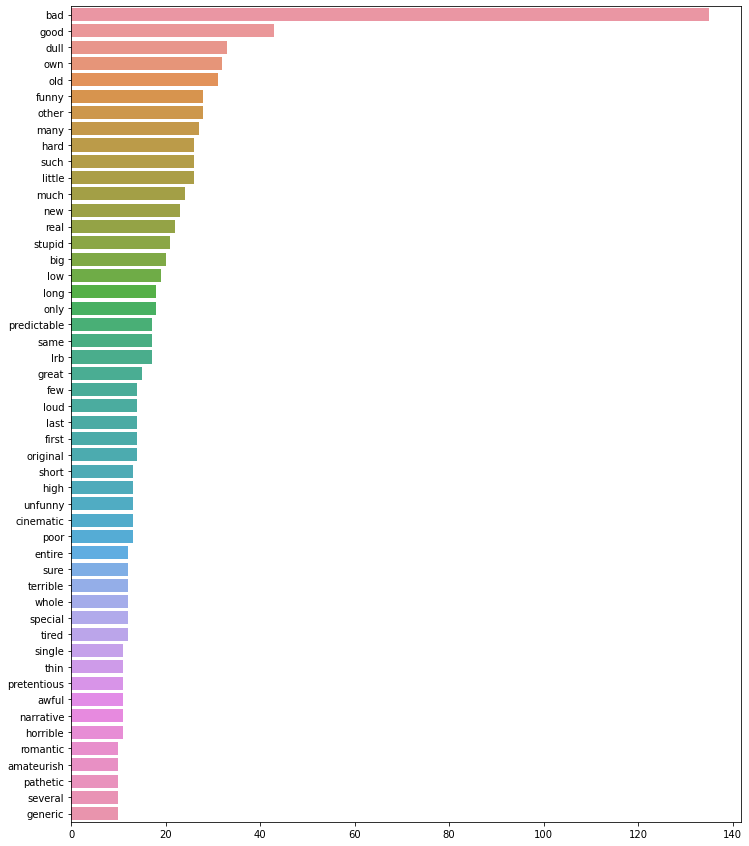

In [53]:
word_count(pro,'a',0)

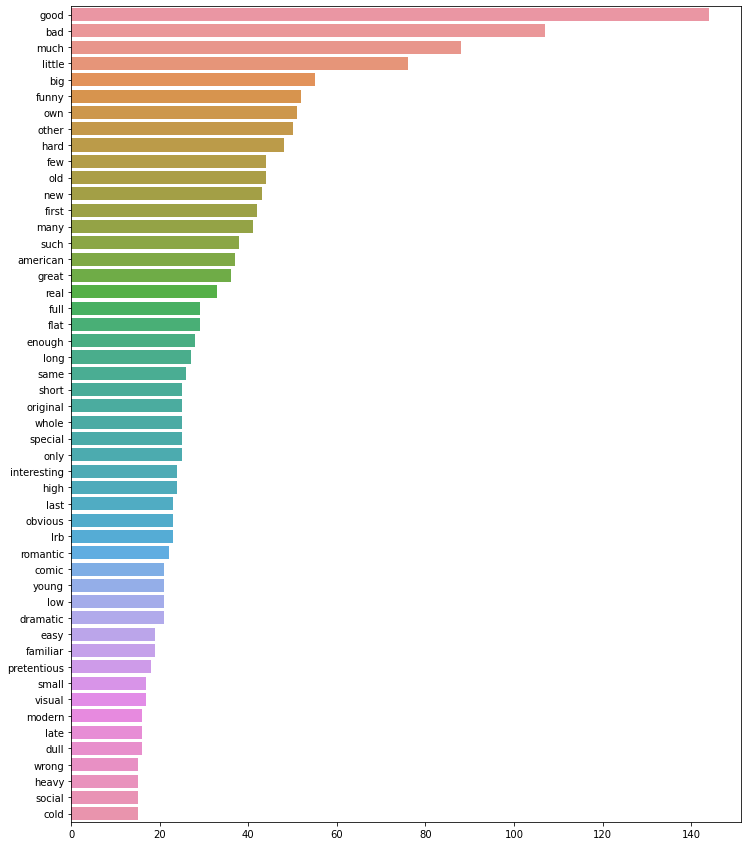

In [57]:
word_count(pro,'a',1)

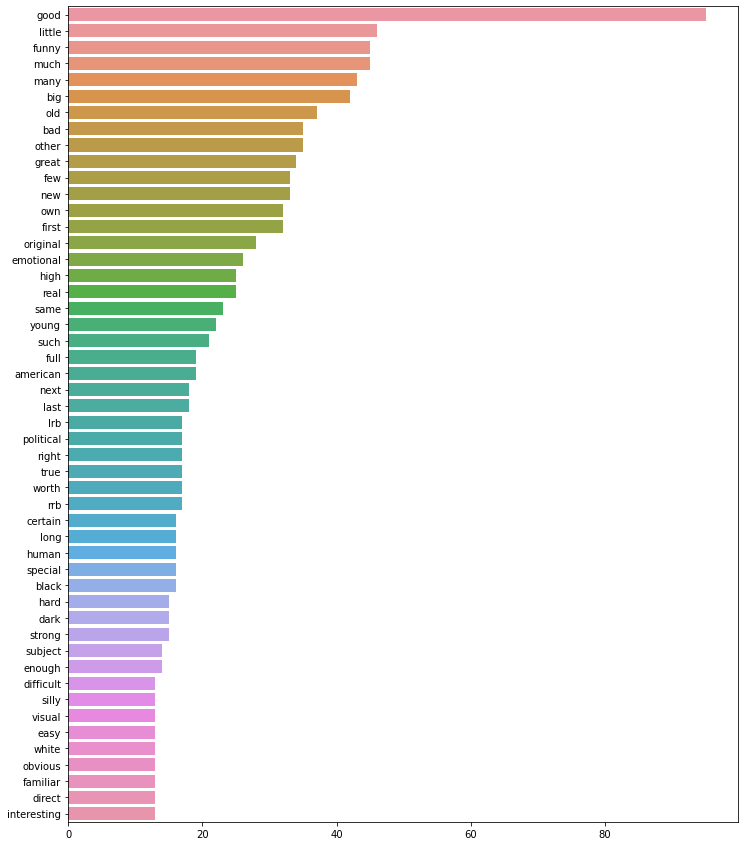

In [55]:
word_count(pro,'a',2)

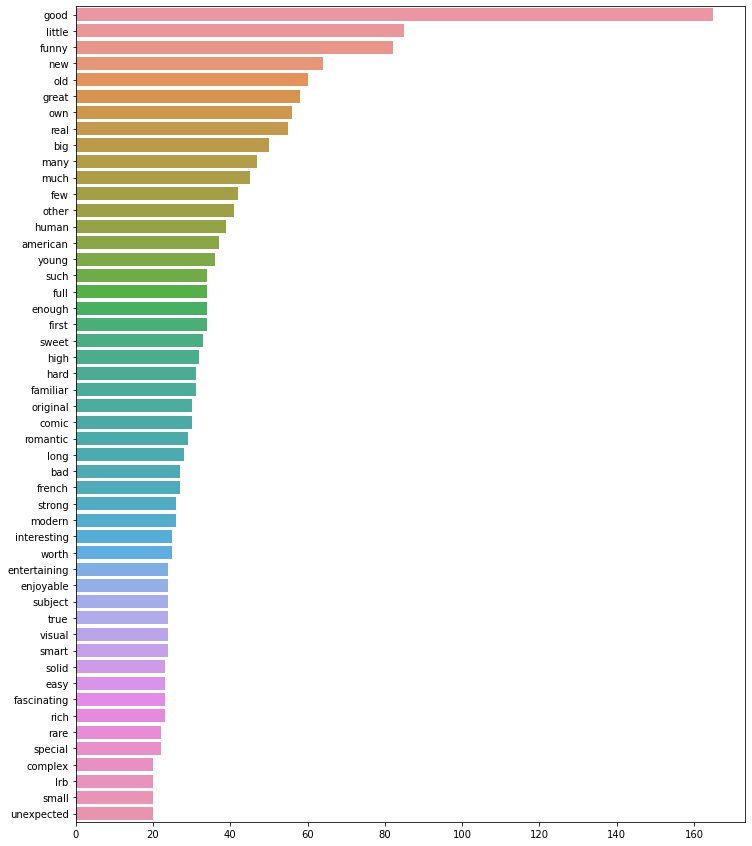

In [56]:
word_count(pro,'a',3)

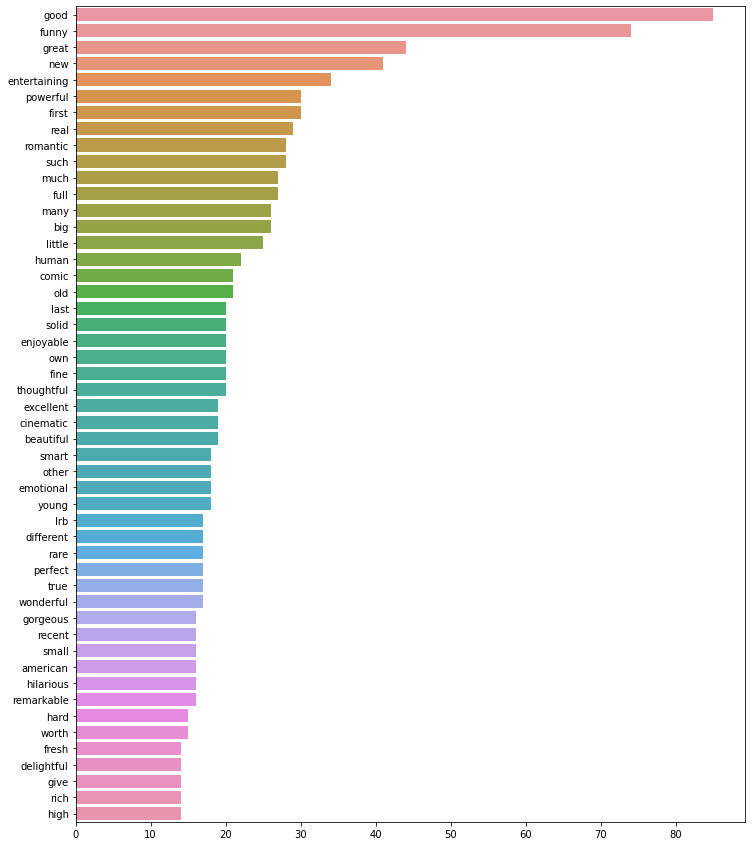

In [60]:
word_count(pro,'a',4)

<AxesSubplot:ylabel='Frequency'>

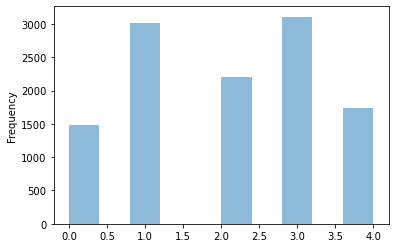

In [148]:
data_train['Category'].plot.hist(bins=10, alpha=0.5)

In [151]:
np.unique(np.array(data_train['Category']),return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([1476, 3015, 2210, 3109, 1734], dtype=int64))

In [ ]:
 sentence = ['this', 'is', 'a', 'sentence'] ##list string to string
'-'.join(sentence)
'this-is-a-sentence'
' '.join(sentence)
'this is a sentence'  

In [34]:
sentence_data[3].lower()

"but , like silence , it 's a movie that gets under your skin ."

In [35]:
sentence_data[3]

"But , like Silence , it 's a movie that gets under your skin ."

In [38]:
" ".join(lemmatize_all(sentence_data[3]))

"But , like Silence , it 's a movie that get under your skin ."

In [33]:
review_text = re.sub("[^a-zA-Z']"," ", sentence_data[3])  ###comma랑 ' 빼고 다 없애는 방법
review_text = re.sub("\s+"," ", review_text)
review_text = re.sub("\s'","'", review_text)
#shortword = re.compile(r'\s+\w{1}\b') ## 's 놔두는 방법
#shortword = re.compile(r'\W*\b\w{1,2}\b')  ## 's 없애는 방법, 이 방법 쓸거면 ' 그냥 제일 처음에 없애버려도 된다.
short_word = re.sub(r'\W*\b\w{1,2}\b','',review_text) #'s 없애고, 2글자 없애는 방법
#print(shortword.sub('', review_text))
print(short_word)
print(review_text)

But like Silence movie that gets under your skin 
But like Silence it's a movie that gets under your skin 


In [ ]:
 df['nwords'] = df.Phrase.apply(lambda text: len(re.findall(r'\w+', text))) ##단어 개수 출력 가능

In [ ]:
review_text = re.sub("[^a-zA-Z']"," ", sentence_data[3])  ###comma랑 ' 빼고 다 없애는 방법
review_text = re.sub("\s+"," ", review_text)
review_text = re.sub("\s'","'", review_text)
print(review_text)

In [ ]:
stopwords.words('english')[:10]  ##불용어 제거 but not도 사라진다

In [ ]:
for i,data in enumerate(sentence_data):
    a=re.findall('[-]+',data)
    if a:
        print(f'list: {a},index: {i}')